In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [2]:
columns = ['Age','Gender', 'Years at Company', 'Monthly Income', 'Job Role', 'Job Satisfaction', 'Number of Promotions', 'Distance from Home','Remote Work','Leadership Opportunities','Attrition']
df = pd.read_csv("train.csv")[columns]
print(df.shape)


(59598, 11)


In [3]:
label_enc = LabelEncoder()
df['Attrition'] = label_enc.fit_transform(df['Attrition'])

list(label_enc.inverse_transform([1,0]))
df.head()

,Age,Gender,Years at Company,Monthly Income,Job Role,Job Satisfaction,Number of Promotions,Distance from Home,Remote Work,Leadership Opportunities,Attrition
0,31,Male,19,5390,Education,Medium,2,22,No,No,1
1,59,Female,4,5534,Media,High,3,21,No,No,1
2,24,Female,10,8159,Healthcare,High,0,11,No,No,1
3,36,Female,7,3989,Education,High,1,27,Yes,No,1
4,56,Male,41,4821,Education,Very High,0,71,No,No,1


In [4]:
df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Attrition
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,38.565875,15.753901,7302.397983,0.832578,50.007651,0.524514
std,12.079673,11.245981,2151.457423,0.994991,28.466459,0.499403
min,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000
25%,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000
50%,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000
75%,49.000000,23.000000,8880.000000,2.000000,75.000000,1.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,1.000000


In [5]:
df.describe(include='object')

,Gender,Job Role,Job Satisfaction,Remote Work,Leadership Opportunities
count,59598,59598,59598,59598,59598
unique,2,5,4,2,2
top,Male,Technology,High,No,No
freq,32739,15507,29779,48239,56680


In [6]:
df['Leadership Opportunities'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df['Gender'].value_counts()

Gender
Male      32739
Female    26859
Name: count, dtype: int64

In [8]:
df['Job Role'].value_counts()

Job Role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64

In [9]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64

In [10]:
df['Remote Work'].value_counts()

Remote Work
No     48239
Yes    11359
Name: count, dtype: int64

In [11]:
df['Leadership Opportunities'].value_counts()

Leadership Opportunities
No     56680
Yes     2918
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

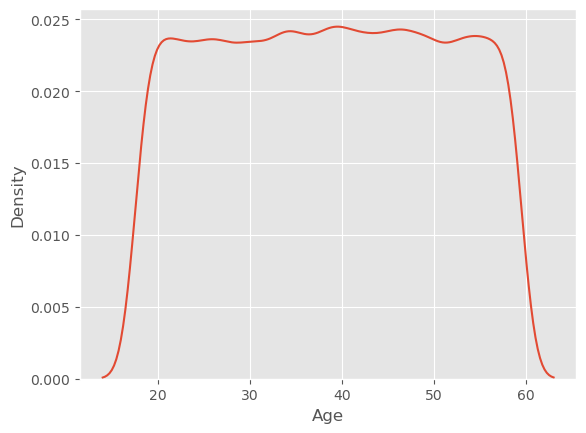

In [12]:
sns.kdeplot(data =df,x='Age')

In [13]:
df['Age'].describe()

count    59598.000000
mean        38.565875
std         12.079673
min         18.000000
25%         28.000000
50%         39.000000
75%         49.000000
max         59.000000
Name: Age, dtype: float64

In [14]:
df.groupby('Attrition')['Age'].mean()

Attrition
0    37.945480
1    39.128279
Name: Age, dtype: float64

<Axes: xlabel='Years at Company', ylabel='Density'>

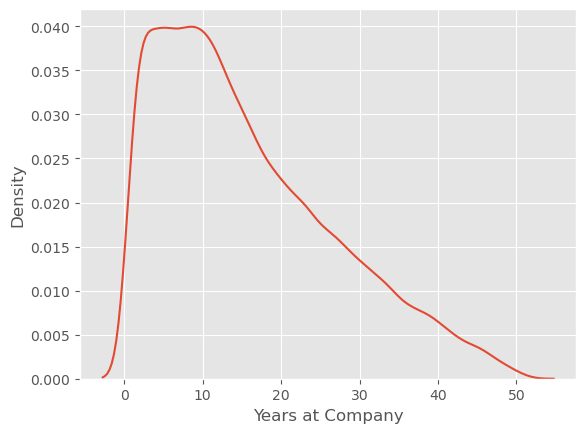

In [15]:
sns.kdeplot(data=df, x='Years at Company')

In [16]:
df[(df['Years at Company'] > 50) & (df['Years at Company'] < 60)]['Years at Company'].count()

26

In [17]:
# removing the employee whose years in company is greater or equal to 50
index = df[df['Years at Company'] >= 50].index
df.drop(index = index, inplace = True)

In [18]:
df.groupby('Attrition')['Years at Company'].mean()

Attrition
0    14.948529
1    16.401108
Name: Years at Company, dtype: float64

<Axes: xlabel='Age', ylabel='Years at Company'>

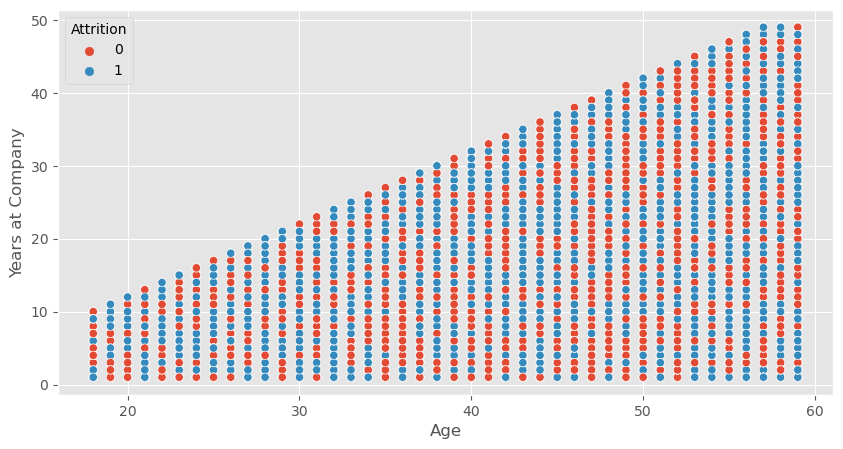

In [19]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=df, x='Age', y='Years at Company', hue='Attrition')

In [20]:
df['Monthly Income'].describe()

count    59523.000000
mean      7302.545739
std       2151.295682
min       1316.000000
25%       5658.000000
50%       7354.000000
75%       8881.000000
max      16149.000000
Name: Monthly Income, dtype: float64

<Axes: xlabel='Age', ylabel='Monthly Income'>

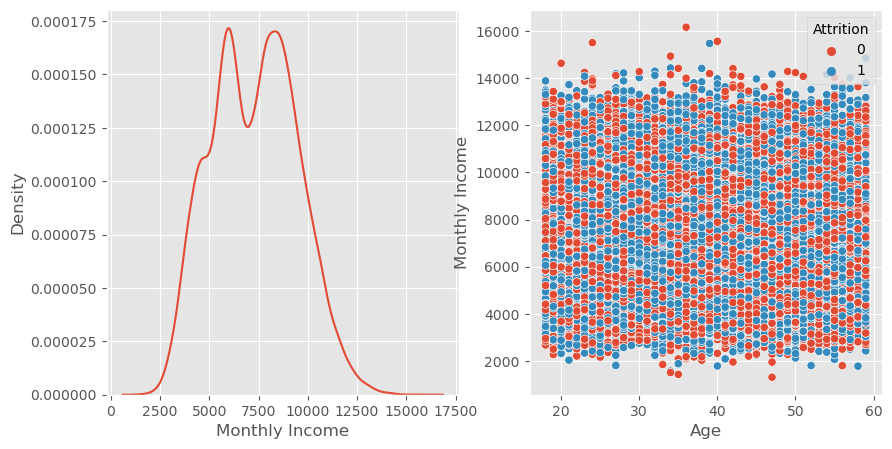

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.kdeplot(data =df, x='Monthly Income')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Age', y='Monthly Income', hue='Attrition')

In [22]:
df.groupby('Attrition')['Monthly Income'].mean()

Attrition
0    7276.984280
1    7325.725141
Name: Monthly Income, dtype: float64

In [24]:
df[(df['Monthly Income'] > 14000) & (df['Monthly Income'] < 18000)]['Years at Company'].count()


33